# Wine data model development and evaluation

Classfiers to evaluate their performance:
- Logistic regression.
- Support vector machine
- K-nearest neighbor classifier
- Random forest classifier
- Decision tree classifier
- Gradient boosting classifier
- Gaussian naive bayes classifier

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluating
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [39]:
df_wines = pd.read_csv("../data/wine_data_model.csv")
df_wines.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'quality_label'],
      dtype='object')

## Label encoding

In [40]:
label_quality = LabelEncoder()
df_wines['quality_label'] = label_quality.fit_transform(df_wines['quality_label'])

## Train-test split 

In [41]:
x_train,x_test,y_train,y_test=train_test_split(df_wines.drop(['quality','type'],axis=1),df_wines['quality_label'],test_size=0.20,random_state=42)

## Model selection

In [43]:
models=[
    LogisticRegression(),
    LinearSVC(),
    SVC(kernel='rbf'),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    GaussianNB()
]

model_names = [
    'LogisticRegression',
    'LinearSVM',
    'rbfSVM',
    'KNearestNeighbors',
    'RandomForestClassifier',
    'DecisionTree',
    'GradientBoostingClassifier', 
    'GaussianNB'
]


In [53]:
acc = []
eval_acc = {}

for model in models:
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    acc.append(accuracy_score(prediction, y_test))
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}

df_model_accuracy = pd.DataFrame.from_dict(eval_acc)
df_model_accuracy = df_model_accuracy.sort_values(by='Accuracy', ascending=False)
df_model_accuracy


[01:38:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Modelling Algorithm,Accuracy
4,RandomForestClassifier,1.000000
5,DecisionTree,1.000000
6,GradientBoostingClassifier,1.000000
7,GaussianNB,1.000000
1,LinearSVM,0.990000
0,LogisticRegression,0.975385
3,KNearestNeighbors,0.708462
2,rbfSVM,0.613846


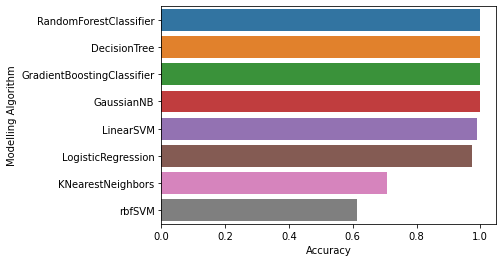

In [61]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=df_model_accuracy).set(title="Model accuracy")
plt.show()